# KEBAIKAN METODE KLASIFIKASI MULTICLASS MENGGUNAKAN HOLD-OUT METHOD DAN CROSS VALIDATION

#SUMBER DATA
Sumber data pada penelitian ini merupakan data sekunder. Data sekunder yang digunakan adalah Seeds Data Set UCI Machine Learning sebanyak 210 observasi. Data diambil pada hari Selasa 4 Desember 2018.

#VARIABEL PENELITIAN
Variabel independen yang digunakan pada penelitian ini sebanyak 7 variabel, yaitu: 
1. Area
2. Perimeter
3. Compactness
4. Length of kernel
5. Width of kernel
6. Asymmetry Coefficient
7. Length of kernel groove


Variabel dependen : Class

# Importing libraries

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Fetching the dataset

In [203]:
data = pd.read_excel("C:/Users/USER/Documents/semester 7/data mining/final project/seeds datasets.xlsx")
data.head()

,area (A),perimeter (P),Compactness C=4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# PREPROCESSING DATA

## Extracting Features and Output

We need to split the dataset into independent and dependent variables. 
In this dataset, the first seven columns are independent variables, 
whereas the last column, 'class', is the dependent variable.

In [204]:
X = data.drop(['class','Compactness C=4*pi*A/P^2'],axis=1)
y = data['class']

In [75]:
X.head()

,area (A),perimeter (P),length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


# Detection Missing Value

In [76]:
data.isnull().any()

area (A)                    False
perimeter (P)               False
Compactness C=4*pi*A/P^2    False
length of kernel            False
width of kernel             False
asymmetry coefficient       False
length of kernel groove     False
class                       False
dtype: bool

there are no outlier in seeds data set

# Feature Scaling

for feature scalling in this dataset use a normalized 

In [205]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [206]:
norm_var = X.columns
for norm in norm_var:
    if norm in X.columns.values:
        X[norm] = preprocessing.normalize(np.array(X[norm_var]))

In [207]:
data.tail()

,area (A),perimeter (P),Compactness C=4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


# Deteksi Outlier

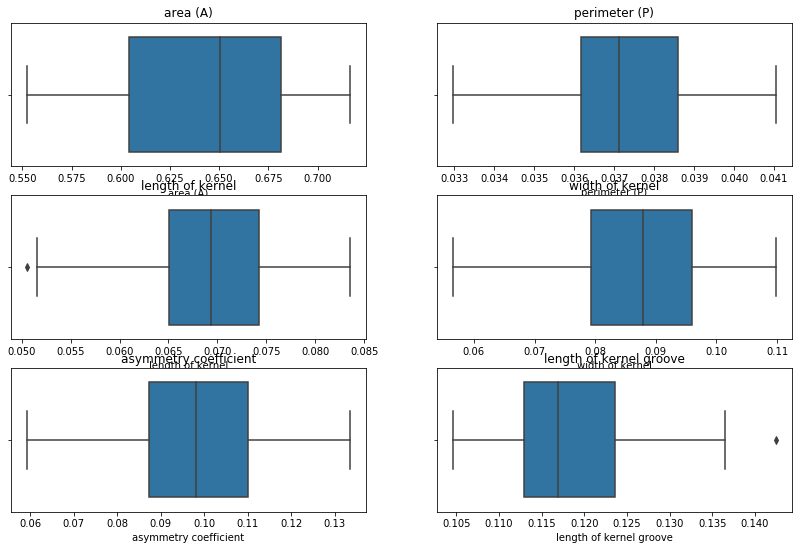

In [210]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,9))
feature_index = 0
for ii in range(3):
    for jj in range(2):
        ax = sns.boxplot(X.iloc[:, feature_index], ax=axes[ii,jj])
        ax.set(title=X.columns.values[feature_index])      
        feature_index += 1
plt.show()

berdasarkan hasil box-plot ditemukan data yang outlier pada variabel asymmetric coefficient dan length of kernel groove, namun untuk memastikan lagi dilakukan pengecekan dengan batas atas dan batas bawah

# Train-Test Data Splitting

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# FEATURE SELECTION

## scatterplot

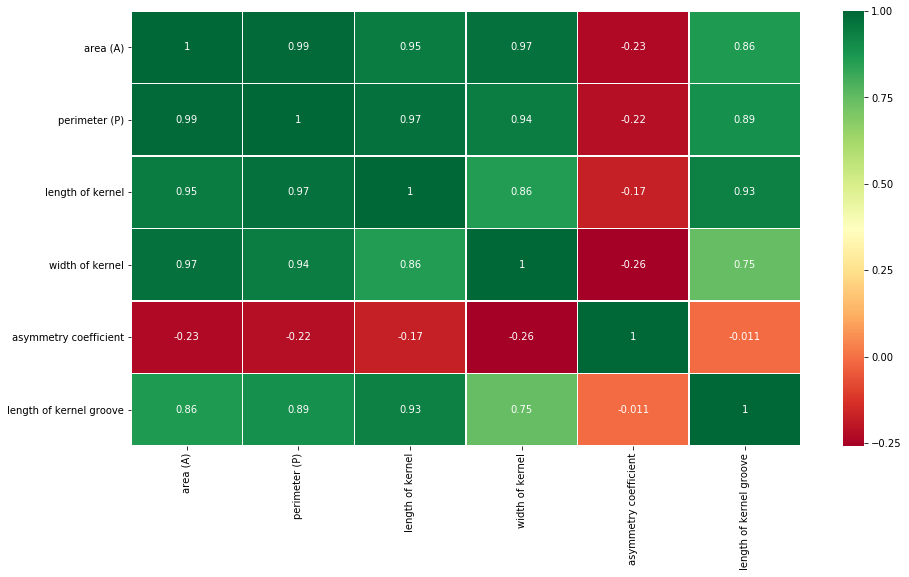

In [197]:
sns.heatmap(X.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

## korelasi pada variabel prediktor

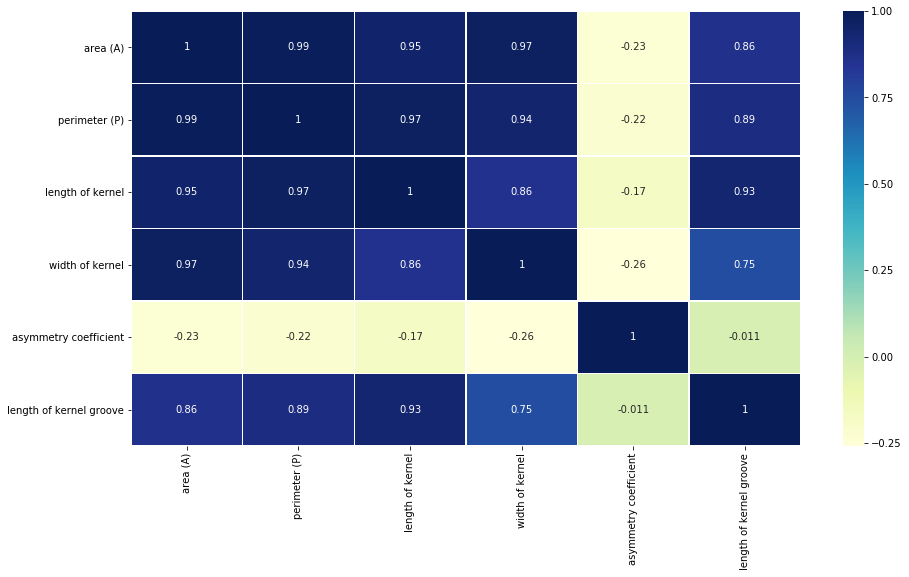

In [84]:
sns.heatmap(X.corr(),linewidths=.5,annot=True,cmap="YlGnBu")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# EKSPLORASI DATA

In [211]:
data.describe()

,area (A),perimeter (P),Compactness C=4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


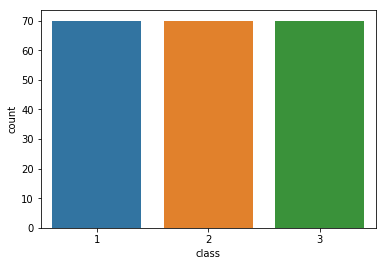

In [212]:
sns.countplot(data['class'])
plt.show()

## Feature Importance Using Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [88]:
RF = RandomForestClassifier(max_depth=None, random_state=123)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [89]:
RF.feature_importances_

array([0.25014046, 0.25547969, 0.12046153, 0.08993603, 0.14722891,
       0.13675339])

In [90]:
X.columns

Index(['area (A)', 'perimeter (P)', 'length of kernel', 'width of kernel',
       'asymmetry coefficient', 'length of kernel groove'],
      dtype='object')

In [91]:
RF_fi = pd.DataFrame({'variables':X.columns, 'feature importance':RF.feature_importances_})
RF_fi.sort_values(['feature importance'], ascending=False)

,variables,feature importance
1,perimeter (P),0.255480
0,area (A),0.250140
4,asymmetry coefficient,0.147229
5,length of kernel groove,0.136753
2,length of kernel,0.120462
3,width of kernel,0.089936


Pada penelitian ini peneliti memiliki batasan nilai feature importance, jika nilai feature importance < 0.05 maka variabel tersebut akan dihilangkan untuk langkah selanjutnya. 

Namun dikarenakan nilai compactness merupakan hasil dari variabel area (A) dan perimeter (p), maka variabel compactness dihilangkan.

# METODE KLASIFIKASI

## Random Forest

In [92]:
RF = RandomForestClassifier(max_depth=None, random_state=123)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [93]:
RF.score(X_train, y_train)

1.0

In [94]:
yRF_predict=RF.predict(X_test)

In [95]:
conf_matrixRF = confusion_matrix(y_test, yRF_predict)
print(conf_matrixRF)

[[10  0  1]
 [ 1  9  0]
 [ 2  0 19]]


In [96]:
ClassRF= ['Kama','Rosa','Canadian']
conf_matrix_dfRF = pd.DataFrame(data=conf_matrixRF, columns=ClassRF, index=ClassRF)
conf_matrix_dfRF

,Kama,Rosa,Canadian
Kama,10,0,1
Rosa,1,9,0
Canadian,2,0,19


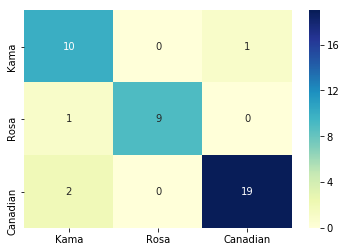

In [97]:
sns.heatmap(conf_matrix_dfRF, annot=True, cmap="YlGnBu")
plt.show()

In [98]:
accuracyRF=accuracy_score(y_test, yRF_predict)
precisionRF=precision_score(y_test, yRF_predict,average='macro')
recallRF=recall_score(y_test,yRF_predict,average='macro')
f1scoreRF=f1_score(y_test, yRF_predict,average='macro')

metode = ['Akurasi','Presisi','Recall','F1 Score']
nilai = [accuracyRF,precisionRF,recallRF,f1scoreRF]

output = pd.DataFrame({'Metode Evaluasi Kebaikan':metode, 'Nilai':nilai})
output

,Metode Evaluasi Kebaikan,Nilai
0,Akurasi,0.904762
1,Presisi,0.906410
2,Recall,0.904618
3,F1 Score,0.902510


## KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [101]:
knn.score(X_train, y_train)

0.9285714285714286

In [102]:
yknn_predict=knn.predict(X_test)

In [103]:
conf_matrixKNN = confusion_matrix(y_test, yknn_predict)
print(conf_matrixKNN)

[[10  0  1]
 [ 1  9  0]
 [ 3  0 18]]


In [104]:
ClassKNN= ['Kama','Rosa','Canadian']
conf_matrix_dfKNN = pd.DataFrame(data=conf_matrixKNN, columns=ClassKNN, index=ClassKNN)
conf_matrix_dfKNN

,Kama,Rosa,Canadian
Kama,10,0,1
Rosa,1,9,0
Canadian,3,0,18


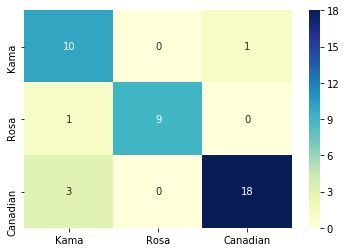

In [105]:
sns.heatmap(conf_matrix_dfKNN, annot=True, cmap="YlGnBu")
plt.show()

In [106]:
accuracyKnn=accuracy_score(y_test, yknn_predict)
precisionKnn=precision_score(y_test, yknn_predict,average='macro')
recallKnn=recall_score(y_test,yknn_predict,average='macro')
f1scoreKnn=f1_score(y_test, yknn_predict,average='macro')

metode = ['Akurasi','Presisi','Recall','F1 Score']
nilai = [accuracyKnn,precisionKnn,recallKnn,f1scoreKnn]

output = pd.DataFrame({'Metode Evaluasi Kebaikan':metode, 'Nilai':nilai})
output

,Metode Evaluasi Kebaikan,Nilai
0,Akurasi,0.880952
1,Presisi,0.887218
2,Recall,0.888745
3,F1 Score,0.882456


## Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [109]:
nb.score(X_train, y_train)

0.9226190476190477

In [110]:
ynb_predict=nb.predict(X_test)

In [111]:
conf_matrixnb = confusion_matrix(y_test, ynb_predict)
print(conf_matrixnb)

[[10  0  1]
 [ 2  8  0]
 [ 2  0 19]]


In [112]:
Classnb= ['Kama','Rosa','Canadian']
conf_matrix_dfnb = pd.DataFrame(data=conf_matrixnb, columns=Classnb, index=Classnb)
conf_matrix_dfnb

,Kama,Rosa,Canadian
Kama,10,0,1
Rosa,2,8,0
Canadian,2,0,19


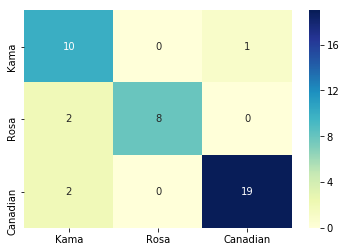

In [113]:
sns.heatmap(conf_matrix_dfnb, annot=True, cmap="YlGnBu")
plt.show()

In [114]:
accuracyNB=accuracy_score(y_test, ynb_predict)
precisionNB=precision_score(y_test, ynb_predict,average='macro')
recallNB=recall_score(y_test,ynb_predict,average='macro')
f1scoreNB=f1_score(y_test, ynb_predict,average='macro')
print(accuracyNB)
print(precisionNB)
print(recallNB)
print(f1scoreNB)

0.8809523809523809
0.8880952380952382
0.8712842712842712
0.8719060523938573


## Logistic Regression Multiclass

In [115]:
from sklearn.linear_model import LogisticRegressionCV

In [116]:
LR = LogisticRegressionCV(random_state=123,multi_class='multinomial')
LR.fit (X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=123, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [117]:
LR.score(X_train, y_train)

1.0

In [118]:
yLR_predict = LR.predict(X_test)

In [119]:
conf_matrixLR = confusion_matrix(y_test, yLR_predict)
print(conf_matrixLR)

[[11  0  0]
 [ 0  9  1]
 [ 2  0 19]]


In [120]:
ClassLR= ['Kama','Rosa','Canadian']
conf_matrix_dfLR = pd.DataFrame(data=conf_matrixLR, columns=ClassLR, index=ClassLR)
conf_matrix_dfLR

,Kama,Rosa,Canadian
Kama,11,0,0
Rosa,0,9,1
Canadian,2,0,19


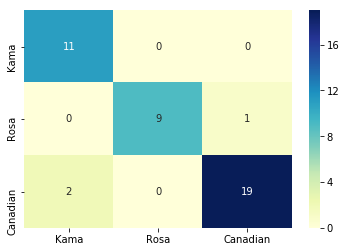

In [121]:
sns.heatmap(conf_matrix_dfLR, annot=True, cmap="YlGnBu")
plt.show()

In [122]:
accuracyLR=accuracy_score(y_test, yLR_predict)
precisionLR=precision_score(y_test, yLR_predict,average='macro')
recallLR=recall_score(y_test,yLR_predict,average='macro')
f1scoreLR=f1_score(y_test, yLR_predict,average='macro')

metode = ['Akurasi','Presisi','Recall','F1 Score']
nilai = [accuracyLR,precisionLR,recallLR,f1scoreLR]

output = pd.DataFrame({'Metode Evaluasi Kebaikan':metode, 'Nilai':nilai})
output

,Metode Evaluasi Kebaikan,Nilai
0,Akurasi,0.928571
1,Presisi,0.932051
2,Recall,0.934921
3,F1 Score,0.930288


## Decision Tree

In [123]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

In [124]:
DT = DecisionTreeClassifier(random_state=123)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [125]:
DT.score(X_train, y_train)

1.0

In [126]:
yDT_predict = DT.predict(X_test)

In [127]:
conf_matrixDT = confusion_matrix(y_test, yDT_predict)
print(conf_matrixDT)

[[11  0  0]
 [ 0 10  0]
 [ 2  0 19]]


In [128]:
ClassDT= ['Kama','Rosa','Canadian']
conf_matrix_dfDT = pd.DataFrame(data=conf_matrixDT, columns=ClassDT, index=ClassDT)
conf_matrix_dfDT

,Kama,Rosa,Canadian
Kama,11,0,0
Rosa,0,10,0
Canadian,2,0,19


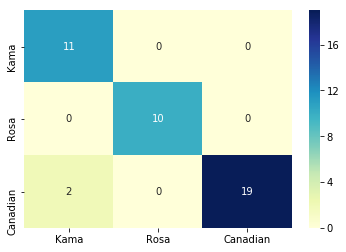

In [129]:
sns.heatmap(conf_matrix_dfDT, annot=True, cmap="YlGnBu")
plt.show()

In [130]:
accuracyDT=accuracy_score(y_test, yDT_predict)
precisionDT=precision_score(y_test, yDT_predict,average='macro')
recallDT=recall_score(y_test,yDT_predict,average='macro')
f1scoreDT=f1_score(y_test, yDT_predict,average='macro')
print(accuracyDT)
print(precisionDT)
print(recallDT)
print(f1scoreDT)

0.9523809523809523
0.9487179487179488
0.9682539682539683
0.9555555555555556


## Gaussian Process Classifier

In [131]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [132]:
GPC = GaussianProcessClassifier(random_state=123)
GPC.fit (X_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=123, warm_start=False)

In [133]:
GPC.score(X_train, y_train)

0.9464285714285714

In [134]:
yGPC_predict = GPC.predict(X_test)

In [135]:
conf_matrixGPC = confusion_matrix(y_test, yGPC_predict)
print(conf_matrixGPC)

[[10  0  1]
 [ 1  9  0]
 [ 2  0 19]]


In [136]:
ClassGPC= ['Kama','Rosa','Canadian']
conf_matrix_dfGPC = pd.DataFrame(data=conf_matrixGPC, columns=ClassGPC, index=ClassGPC)
conf_matrix_dfGPC

,Kama,Rosa,Canadian
Kama,10,0,1
Rosa,1,9,0
Canadian,2,0,19


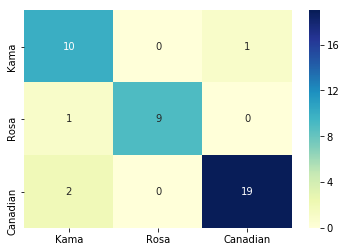

In [137]:
sns.heatmap(conf_matrix_dfGPC, annot=True, cmap="YlGnBu")
plt.show()

In [138]:
accuracyGPC=accuracy_score(y_test, yGPC_predict)
precisionGPC=precision_score(y_test, yGPC_predict,average='macro')
recallGPC=recall_score(y_test,yGPC_predict,average='macro')
f1scoreGPC=f1_score(y_test, yGPC_predict,average='macro')
print(accuracyGPC)
print(precisionGPC)
print(recallGPC)
print(f1scoreGPC)

0.9047619047619048
0.9064102564102564
0.9046176046176045
0.9025103408928826


## Linear Support Vector Classification

In [139]:
from sklearn.svm import LinearSVC

In [140]:
SVC = LinearSVC(random_state=123)
SVC.fit (X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)

In [141]:
SVC.score(X_train, y_train)

0.9523809523809523

In [142]:
ySVC_predict = SVC.predict(X_test)

In [143]:
conf_matrixSVC = confusion_matrix(y_test, ySVC_predict)
print(conf_matrixSVC)

[[11  0  0]
 [ 0 10  0]
 [ 2  0 19]]


In [144]:
ClassSVC= ['Kama','Rosa','Canadian']
conf_matrix_dfSVC = pd.DataFrame(data=conf_matrixSVC, columns=ClassSVC, index=ClassSVC)
conf_matrix_dfSVC

,Kama,Rosa,Canadian
Kama,11,0,0
Rosa,0,10,0
Canadian,2,0,19


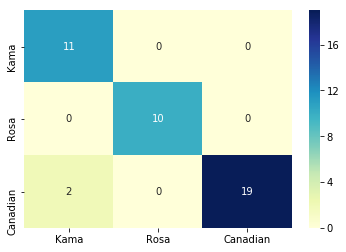

In [145]:
sns.heatmap(conf_matrix_dfSVC, annot=True, cmap="YlGnBu")
plt.show()

In [146]:
accuracySVC=accuracy_score(y_test, ySVC_predict)
precisionSVC=precision_score(y_test, ySVC_predict,average='macro')
recallSVC=recall_score(y_test,ySVC_predict,average='macro')
f1scoreSVC=f1_score(y_test, ySVC_predict,average='macro')
print(accuracySVC)
print(precisionSVC)
print(recallSVC)
print(f1scoreSVC)

0.9523809523809523
0.9487179487179488
0.9682539682539683
0.9555555555555556


## Ridge Classifier

In [147]:
from sklearn.linear_model import RidgeClassifier

In [148]:
rr = RidgeClassifier(random_state=123)
rr.fit (X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=123, solver='auto',
        tol=0.001)

In [149]:
rr.score(X_train, y_train)

0.9642857142857143

In [150]:
yrr_predict = rr.predict(X_test)

In [151]:
conf_matrixrr = confusion_matrix(y_test, yrr_predict)
print(conf_matrixrr)

[[11  0  0]
 [ 0 10  0]
 [ 2  0 19]]


In [152]:
Classrr= ['Kama','Rosa','Canadian']
conf_matrix_dfrr = pd.DataFrame(data=conf_matrixrr, columns=Classrr, index=Classrr)
conf_matrix_dfrr

,Kama,Rosa,Canadian
Kama,11,0,0
Rosa,0,10,0
Canadian,2,0,19


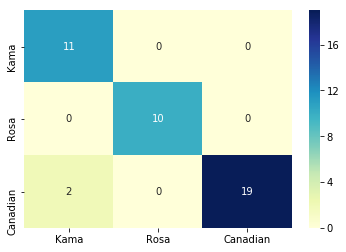

In [153]:
sns.heatmap(conf_matrix_dfrr, annot=True, cmap="YlGnBu")
plt.show()

In [154]:
accuracyrr=accuracy_score(y_test, yrr_predict)
precisionrr=precision_score(y_test, yrr_predict,average='macro')
recallrr=recall_score(y_test,yrr_predict,average='macro')
f1scorerr=f1_score(y_test, yrr_predict,average='macro')
print(accuracyrr)
print(precisionrr)
print(recallrr)
print(f1scorerr)

0.9523809523809523
0.9487179487179488
0.9682539682539683
0.9555555555555556


# Perbandingan Setiap Metode Klasifikasi

In [155]:
# Hold-Out Method
metode = ('Random Forest','KNN Classifier','Naive Bayes','Logistic Regression Multiclass','Decision Tree','Gaussian Process Classifier', 'Linear SVC','Ridge Classifier')
akurasi = (accuracyRF,accuracyKnn,accuracyNB,accuracyLR,accuracyDT,accuracyGPC,accuracySVC,accuracyrr)
presisi = (precisionRF,precisionKnn,precisionNB,precisionLR,precisionDT,precisionGPC,precisionSVC,precisionrr)
recall = (recallRF,recallKnn,recallNB,recallLR,recallDT,recallGPC,recallSVC,recallrr)
f1score = (f1scoreRF,f1scoreKnn,f1scoreNB,f1scoreLR,f1scoreDT,f1scoreGPC,f1scoreSVC,f1scorerr)
output_ho = pd.DataFrame({'Metode':metode, 'Akurasi':akurasi,'Presisi':presisi,'Recall':recall,'F1 score':f1score})
output_ho.sort_values(['Akurasi','Presisi','Recall','F1 score'], ascending=False)

,Metode,Akurasi,Presisi,Recall,F1 score
4,Decision Tree,0.952381,0.948718,0.968254,0.955556
6,Linear SVC,0.952381,0.948718,0.968254,0.955556
7,Ridge Classifier,0.952381,0.948718,0.968254,0.955556
3,Logistic Regression Multiclass,0.928571,0.932051,0.934921,0.930288
0,Random Forest,0.904762,0.906410,0.904618,0.902510
5,Gaussian Process Classifier,0.904762,0.906410,0.904618,0.902510
2,Naive Bayes,0.880952,0.888095,0.871284,0.871906
1,KNN Classifier,0.880952,0.887218,0.888745,0.882456


In [196]:
# cross-validation
n=5 #jumlah fold
skf=StratifiedKFold(n_splits=n, random_state=123)
a = cross_val_score(RF, X_train, y_train, cv=skf).mean()
b = cross_val_score(knn, X_train, y_train, cv=skf).mean()
c = cross_val_score(nb, X_train, y_train, cv=skf).mean()
d = cross_val_score(LR, X_train, y_train, cv=skf).mean()
e = cross_val_score(DT, X_train, y_train, cv=skf).mean()
f = cross_val_score(GPC, X_train, y_train, cv=skf).mean()
g = cross_val_score(SVC, X_train, y_train, cv=skf).mean()
h = cross_val_score(rr, X_train, y_train, cv=skf).mean()

cv = (a,b,c,d,e,f,g,h)
output_cv = pd.DataFrame({'Metode':metode, 'Cross validation':cv})
output_cv.sort_values(['Cross validation'], ascending=False)

,Metode,Cross validation
3,Logistic Regression Multiclass,0.958824
7,Ridge Classifier,0.958456
6,Linear SVC,0.946691
0,Random Forest,0.935294
2,Naive Bayes,0.911397
5,Gaussian Process Classifier,0.911029
4,Decision Tree,0.905147
1,KNN Classifier,0.893382


In [167]:
output = pd.DataFrame({'Metode':metode, 'Akurasi':akurasi,'Presisi':presisi,'Recall':recall,'F1 score':f1score,'Cross validation':cv})
output.sort_values(['Akurasi','Cross validation'], ascending=False)

,Metode,Akurasi,Presisi,Recall,F1 score,Cross validation
6,Linear SVC,0.952381,0.948718,0.968254,0.955556,0.970588
7,Ridge Classifier,0.952381,0.948718,0.968254,0.955556,0.958456
4,Decision Tree,0.952381,0.948718,0.968254,0.955556,0.905147
3,Logistic Regression Multiclass,0.928571,0.932051,0.934921,0.930288,0.958824
0,Random Forest,0.904762,0.906410,0.904618,0.902510,0.934926
5,Gaussian Process Classifier,0.904762,0.906410,0.904618,0.902510,0.911029
2,Naive Bayes,0.880952,0.888095,0.871284,0.871906,0.911397
1,KNN Classifier,0.880952,0.887218,0.888745,0.882456,0.893382


# Parameter Tuning 

SVC dengan Parameter Tuning

In [227]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
gridsvc = GridSearchCV(SVC, param_grid=param, scoring='accuracy', cv=10)

In [228]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [229]:
gridsvc.best_params_

{'C': 1}

nilai C yang didapat sudah sama dengan yang dicoba sebelumnya, maka tidak diperlukan pengujian lagi untuk Linear SVC. karena nilai akurasi yang dihasilkan sama dengan sebelumnya